In [1]:
import os
import requests
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# ../data/df_test.csv
data_folder = os.path.join("..", "data")
csv_name = "df_test.csv"
csv_path = os.path.join(data_folder, csv_name)

<hr>

Load df_test.csv

In [3]:
df = pd.read_csv(csv_path)
df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,days_in_waiting_list,...,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_date_weekday_Monday,arrival_date_weekday_Saturday,arrival_date_weekday_Sunday,arrival_date_weekday_Thursday,arrival_date_weekday_Tuesday,arrival_date_weekday_Wednesday
0,0,23,2,0,2,0.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,158,0,2,1,0.0,0,0,0,31,...,0,0,1,0,0,0,0,0,1,0
2,0,52,0,2,2,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,182,1,2,2,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,37,0,3,2,0.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


<hr>

Create features and target(s) arrays: X and y

In [4]:
X = df.drop("is_canceled", axis=1).values
print(X[:2])

[[ 23.    2.    0.    2.    0.    0.    0.    0.    0.  103.5   1.    1.
    0.    1.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.
    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    1.    0.    0.    0.    1.    0.    0.    0. ]
 [158.    0.    2.    1.    0.    0.    0.    0.   31.  130.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.
    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.
    0.    0.    1.    0.    0.    0.    0.    0.    1.    0. ]]


In [5]:
y = df["is_canceled"].values
print(y[:5])

[0 1 0 1 1]


<hr>

Create a JSON with X values and make a POST request to model API

In [6]:
payload = {"data": X.tolist()}
headers = {"Content-Type": "application/json"}

# url = "http://localhost:8008/predict/v1"
# url = "http://hurb-ml.herokuapp.com/predict/v1"
url = "http://hurb.henchaves.com/predict/v1"

In [7]:
json_response = requests.post(url, json=payload, headers=headers)
json_response

<Response [200]>

In [8]:
y_pred = np.array(json.loads(json_response.text)["predictions"])

<hr>

Print a classification report of actual values and predictions, to check some statistics such as recall (important to this case)

In [9]:
report = classification_report(y, y_pred, output_dict=True)
display(report)
print("\nrecall:", report["1"]["recall"])

{'0': {'precision': 0.8361945636623748,
  'recall': 0.9330850073167487,
  'f1-score': 0.8819867966048411,
  'support': 15034},
 '1': {'precision': 0.8583497606308083,
  'recall': 0.689280868385346,
  'f1-score': 0.7645804590492915,
  'support': 8844},
 'accuracy': 0.8427841527766144,
 'macro avg': {'precision': 0.8472721621465915,
  'recall': 0.8111829378510473,
  'f1-score': 0.8232836278270663,
  'support': 23878},
 'weighted avg': {'precision': 0.8444004670876545,
  'recall': 0.8427841527766144,
  'f1-score': 0.8385015110138669,
  'support': 23878}}


recall: 0.689280868385346


<hr>

Plot a confusion matrix of actual and predicted labels

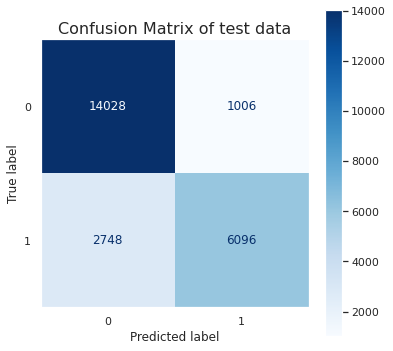

In [10]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Confusion Matrix of test data", fontsize=16)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.grid(False)
plt.show()